<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Demo-of-Cleaning-Functions" data-toc-modified-id="Demo-of-Cleaning-Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Demo of Cleaning Functions</a></span><ul class="toc-item"><li><span><a href="#Columns" data-toc-modified-id="Columns-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Columns</a></span></li><li><span><a href="#Outliers" data-toc-modified-id="Outliers-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Outliers</a></span></li><li><span><a href="#Transformations" data-toc-modified-id="Transformations-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Transformations</a></span></li></ul></li></ul></div>

In [1]:
import datetime as dt
import sys
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(sys.executable)
print(sys.version)
print(f"Pandas {pd.__version__}")
print(f"Seaborn {sns.__version__}")

C:\Users\r2d4\miniconda3\envs\py3\python.exe
3.8.3 (default, May 19 2020, 06:50:17) [MSC v.1916 64 bit (AMD64)]
Pandas 1.1.3
Seaborn 0.11.0


In [3]:
sys.path.append(str(Path.cwd().parent / 'src' / 'codebook'))

In [4]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
plt.style.use('raph-base')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('precision', 2)
pd.set_option('display.max_columns', 30)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 800)

In [5]:
import src.codebook.EDA as EDA
import src.codebook.clean as clean

## Load Data

In [6]:
df = pd.read_csv("../data/realWorldTestData.csv", 
                 low_memory=False, 
                 nrows=1000,
                 usecols=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 18]
                 )

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   target_event                   1000 non-null   object 
 1   NUM_CONSEC_SERVICES            1000 non-null   int64  
 2   SUM_INVOICE_AMOUNT_IN_SERVICE  1000 non-null   float64
 3   SUM_INVOICE_AMOUNT             1000 non-null   float64
 4   NUM_EVENTS                     1000 non-null   int64  
 5   FIRST_EVT                      1000 non-null   object 
 6   LAST_EVT                       1000 non-null   object 
 7   LAST_MILEAGE                   1000 non-null   float64
 8   MEAN_MILEAGE_PER_MNTH          1000 non-null   float64
 9   AVG_DIFF_MNTH                  1000 non-null   int64  
 10  age_mnth                       1000 non-null   int64  
 11  KANTON_LICENCE_PLATE           991 non-null    object 
 12  INSPECTION_INTERVAL_UID        1000 non-null   ob

## Demo of Cleaning Functions 
### Columns

In [8]:
# Prettify the column names 

df = clean.prettify_column_names(df)

# Check result
df.columns

Index(['target_event', 'num_consec_services', 'sum_invoice_amount_in_service',
       'sum_invoice_amount', 'num_events', 'first_evt', 'last_evt',
       'last_mileage', 'mean_mileage_per_mnth', 'avg_diff_mnth', 'age_mnth',
       'kanton_licence_plate', 'inspection_interval_uid', 'car_brand_uid'],
      dtype='object')

In [9]:
# Delete columns

df_del = clean.delete_columns(df, cols_to_delete=["target_event", "first_evt"])

assert df_del.shape[1] == (df.shape[1] - 2)

Column target_event successfully deleted.
Column first_evt successfully deleted.


In [10]:
# Downcast dtypes

df_lean = clean.downcast_dtypes(df)

# Check result
df_lean.dtypes

 Original df size before downcasting: 0.46 MB
 New df size after downcasting:0.17 MB


target_event                     category
num_consec_services                  int8
sum_invoice_amount_in_service     float32
sum_invoice_amount                float32
num_events                           int8
first_evt                        category
last_evt                         category
last_mileage                      float32
mean_mileage_per_mnth             float32
avg_diff_mnth                        int8
age_mnth                             int8
kanton_licence_plate             category
inspection_interval_uid          category
car_brand_uid                    category
dtype: object

<b><font color='red'>A word of Warning:</span></b><font color='red'></font> Downcasting the numerical dtypes this way can lead to problems with the power transforms that are demonstrated below. That's why we continue with the original frame here.

### Outliers

In [11]:
# Count Outliers using the IQR-Method, with a distance of X

clean.count_outliers_IQR_method(df, iqr_dist=2)


num_consec_services:
 - effective upper cut-off value: 7.00
 - effective lower cut-off value: 1.00
 - Identified outliers: 6
 - of total values: 0.6%

sum_invoice_amount_in_service:
 - effective upper cut-off value: 0.00
 - effective lower cut-off value: 0.00
 - Identified outliers: 69
 - of total values: 6.9%

sum_invoice_amount:
 - effective upper cut-off value: 4,930.24
 - effective lower cut-off value: 0.00
 - Identified outliers: 35
 - of total values: 3.5%

num_events:
 - effective upper cut-off value: 31.75
 - effective lower cut-off value: 3.00
 - Identified outliers: 14
 - of total values: 1.4%

last_mileage:
 - effective upper cut-off value: 172,933.25
 - effective lower cut-off value: 1,296.00
 - Identified outliers: 14
 - of total values: 1.4%

mean_mileage_per_mnth:
 - effective upper cut-off value: 2,912.81
 - effective lower cut-off value: 50.64
 - Identified outliers: 19
 - of total values: 1.9%

avg_diff_mnth:
 - effective upper cut-off value: 9.00
 - effective lower 

In [12]:
# Remove outliers in two selected columns

outlier_cols=["avg_diff_mnth", "mean_mileage_per_mnth"]

df_outliers, deleted_idx = clean.remove_outliers_IQR_method(
    df,
    outlier_cols=outlier_cols,
    iqr_dist=2,
    return_idx_deleted=True
)


avg_diff_mnth: 
Rows to remove: 22


mean_mileage_per_mnth: 
Rows to remove: 19


Rows removed in total: 41
(Percentage of original DataFrame: 4.1%)


In [13]:
# Because we have set the `return_idx_deleted` param to true
# We have also received a list of the removed outliers' index values

print(deleted_idx)

[257, 2, 3, 771, 646, 266, 527, 917, 282, 418, 550, 422, 171, 555, 180, 309, 59, 321, 836, 453, 710, 200, 841, 330, 587, 971, 75, 718, 850, 210, 596, 980, 599, 856, 739, 239, 497, 758, 887, 632, 637]


In [14]:
# Winsorize outliers in two more columns
# (We use the IQR-Method output from above to define the quantiles)

w_dict = {
    "sum_invoice_amount": (None, 0.035),
    "last_mileage": (0.0005, 0.014),
}

df_w = clean.winsorize_outliers(df, w_dict)

# Check results
print(list(zip(
        df_w[list(w_dict.keys())].min(),
        df_w[list(w_dict.keys())].max()
        )))

[(0.0, 4889.35), (1296.0, 171053.0)]


### Transformations

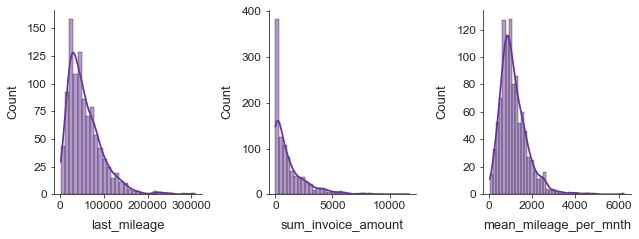

In [15]:
df_transform = df[["last_mileage", "sum_invoice_amount", "mean_mileage_per_mnth"]]. copy()

EDA.plot_distr_histograms(df_transform)

Zero or negative value(s) in col sum_invoice_amount, all data is shifted by 0.1. Alternatively use method 'yeo-johnson'.


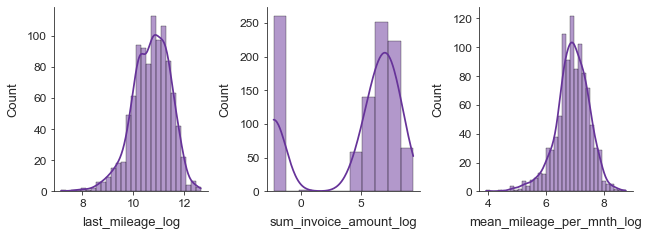

In [16]:
df_log = clean.transform_data(df_transform, method="log")

EDA.plot_distr_histograms(df_log)

Zero or negative value(s) in col sum_invoice_amount, all data is shifted by 0.1. Alternatively use method 'yeo-johnson'.


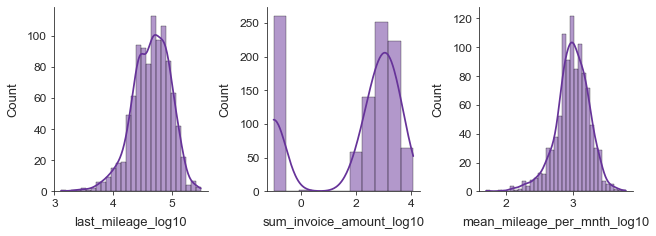

In [17]:
df_log10 = clean.transform_data(df_transform, method="log10")

EDA.plot_distr_histograms(df_log10)

Zero or negative value(s) in col sum_invoice_amount, all data is shifted by 0.1. Alternatively use method 'yeo-johnson'.


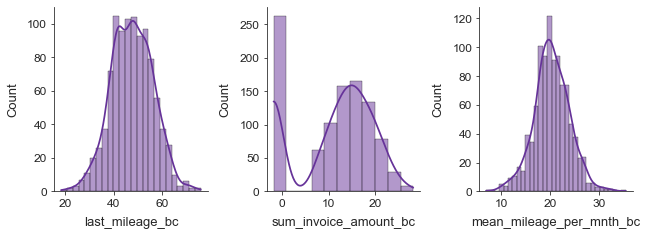

In [18]:
df_bc = clean.transform_data(df_transform, method="box_cox")

EDA.plot_distr_histograms(df_bc)

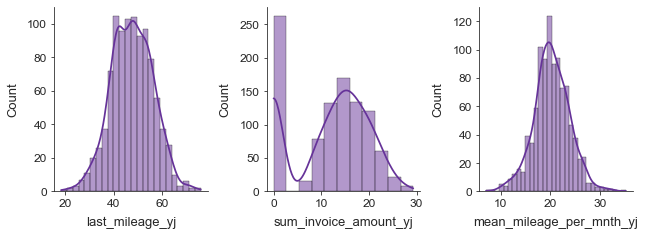

In [19]:
df_jy = clean.transform_data(df_transform, method="yeo_johnson")

EDA.plot_distr_histograms(df_jy)